/var/folders/s5/f8vfnvw97ndgvw164__3yzbc0000gn/T/ipykernel_8895/1287031873.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


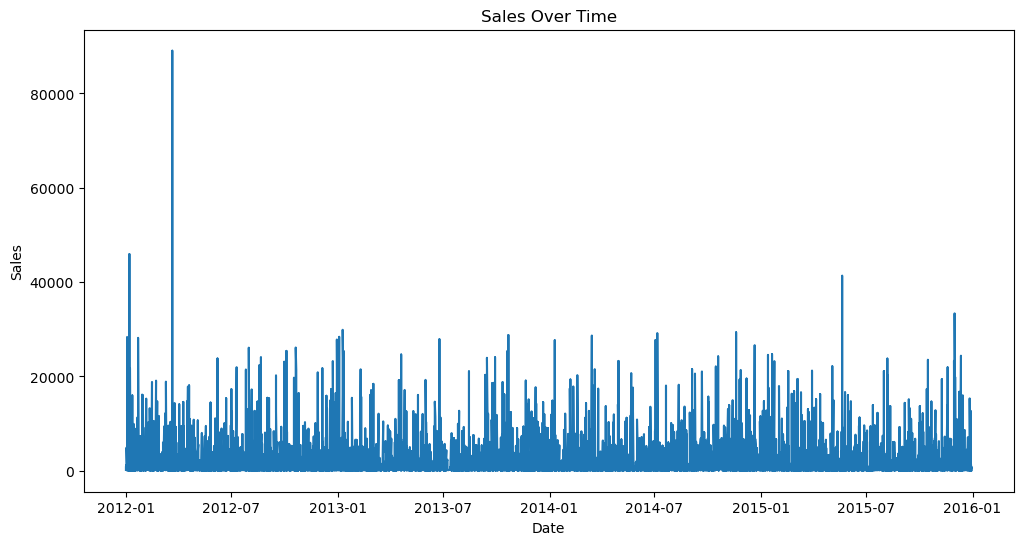

/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/50, Loss: 3445529444.8750
Epoch 2/50, Loss: 3421823413.1250
Epoch 3/50, Loss: 3383394693.6250
Epoch 4/50, Loss: 3332845554.4375
Epoch 5/50, Loss: 3273495560.0625
Epoch 6/50, Loss: 3209080056.2500
Epoch 7/50, Loss: 3143275059.6250
Epoch 8/50, Loss: 3079422712.6250
Epoch 9/50, Loss: 3020103682.0000
Epoch 10/50, Loss: 2967345296.6250
Epoch 11/50, Loss: 2922265810.2500
Epoch 12/50, Loss: 2885219547.3750
Epoch 13/50, Loss: 2856024787.0000
Epoch 14/50, Loss: 2833955846.3750
Epoch 15/50, Loss: 2817863338.7500
Epoch 16/50, Loss: 2806659530.2500
Epoch 17/50, Loss: 2799147149.2500
Epoch 18/50, Loss: 2795262736.0000
Epoch 19/50, Loss: 2791987001.3750
Epoch 20/50, Loss: 2790669480.3750
Epoch 21/50, Loss: 2788689433.3750
Epoch 22/50, Loss: 2790094397.0000
Epoch 23/50, Loss: 2788705930.2500
Epoch 24/50, Loss: 2787477830.3750
Epoch 25/50, Loss: 2787387715.7500
Epoch 26/50, Loss: 2787087489.5000
Epoch 27/50, Loss: 2786197143.7500
Epoch 28/50, Loss: 2786561764.5000
Epoch 29/50, Loss: 2786232934

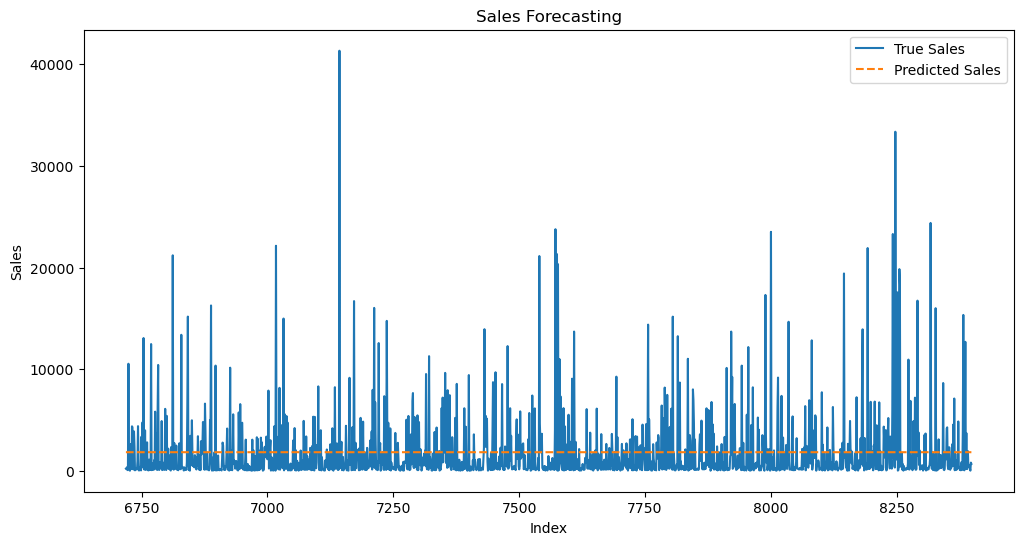

In [9]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Step 2: Load and Prepare the Data
data = pd.read_csv(r"/Users/ankitprasad/Downloads/walmart Retail Data.csv")

# Clean column names to remove extra spaces
data.columns = data.columns.str.strip()

# Handle missing values
data.ffill(inplace=True)  # using forward fill as recommended

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Feature engineering from Order Date
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['day'] = data['Order Date'].dt.day

# Step 3: Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['Order Date'], data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Step 4: Train-Test Split
X = data[['year', 'month', 'day']]  # You can add more features here
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=4)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # add sequence dimension
        x = self.encoder(x)
        x = x.squeeze(1)
        x = self.fc(x)
        return x

# Step 6: Train the Model
train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
                              torch.tensor(y_train.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

model = TransformerModel(input_dim=3, hidden_dim=64, output_dim=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Step 7: Evaluate the Model
model.eval()
with torch.no_grad():
    y_pred = model(torch.tensor(X_test.values, dtype=torch.float32)).numpy()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Step 8: Forecasting and Results Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="True Sales")
plt.plot(y_test.index, y_pred, label="Predicted Sales", linestyle="--")
plt.title("Sales Forecasting")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Step 9: Analysis and Insights
# You can now explore patterns: daily/monthly/seasonal trends, high-performing categories, etc.

In [2]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Copy the original data for safe enhancement
df = data.copy()

# Step 1: Encode Categorical Features
categorical_cols = ['Product Category', 'Region', 'State', 'Order Priority']
df[categorical_cols] = df[categorical_cols].astype(str)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 2: Sort by date (important for time-based features)
df = df.sort_values('Order Date')

# Step 3: Lag Feature - Previous Day Sales
df['lag_1'] = df['Sales'].shift(1)

# Step 4: Rolling Window Features (e.g., 7-day sales average)
df['rolling_7_mean'] = df['Sales'].rolling(window=7).mean()

# Step 5: Drop rows with NaN from lag/rolling
df.dropna(inplace=True)

# Step 6: Recreate X and y
features = ['year', 'month', 'day', 'lag_1', 'rolling_7_mean'] + \
            [col for col in df.columns if col.startswith(('Product Category_', 'Region_', 'State_', 'Order Priority_'))]

X = df[features]
y = df['Sales']

# Step 7: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

/var/folders/s5/f8vfnvw97ndgvw164__3yzbc0000gn/T/ipykernel_8895/2841977668.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/var/folders/s5/f8vfnvw97ndgvw164__3yzbc0000gn/T/ipykernel_8895/2841977668.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


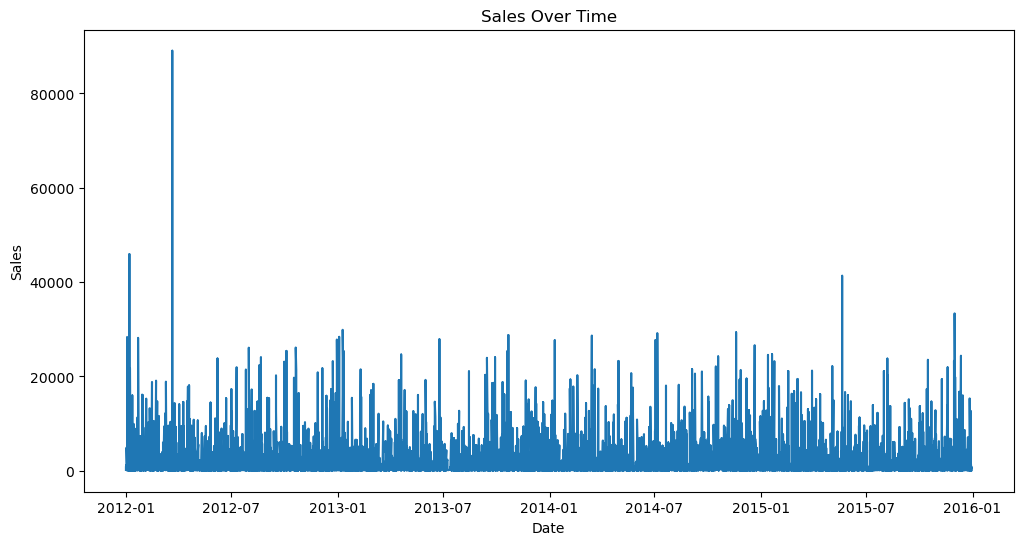

AssertionError: was expecting embedding dimension of 64, but got 3

In [23]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Step 2: Load and Prepare the Data
# Example data: Replace with your own dataset
data = pd.read_csv(r"/Users/ankitprasad/Downloads/walmart Retail Data.csv")

# Handle missing values, if necessary
data.fillna(method='ffill', inplace=True)

# Feature engineering (Assume 'Order Date' is the date column)
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['day'] = data['Order Date'].dt.day

# Step 3: Data Visualization (Optional)
plt.figure(figsize=(12, 6))
plt.plot(data['Order Date'], data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Step 4: Train-Test Split
X = data[['year', 'month', 'day']]  # Add more features as needed
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build the Transformer Model (Example: Temporal Fusion Transformer)
class TransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TransformerModel, self).__init__()
        self.encoder = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=4)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.encoder(x)
        x = self.fc(x)
        return x

# Step 6: Convert data to PyTorch tensors and create DataLoader
train_dataset = TensorDataset(
    torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1),  # Add sequence dimension
    torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

# Step 7: Initialize the model
model = TransformerModel(input_dim=3, hidden_dim=64, output_dim=1)  # Adjust input and hidden dims as needed
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Step 8: Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Step 9: Evaluate the Model
model.eval()
X_test_tensor = torch.tensor(X_test.values).unsqueeze(1)
y_pred = model(X_test_tensor).squeeze(1).detach().numpy()  # Remove unnecessary dimensions

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"\n✅ RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Step 10: Forecasting and Results Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="True Sales")
plt.plot(y_test.index, y_pred, label="Predicted Sales", linestyle="--")
plt.title("Sales Forecasting")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Step 11: Analysis and Insights (Optional)
# Example: Compare predicted vs actual sales, analyze trends, seasonality, etc.
# Insights will depend on the nature of your dataset and the model's performance.